https://colab.research.google.com/github/JunetaeKim/GCSP-HBDA/blob/main/Week7/FunctionalAPI_l1l2.ipynb

# TensorFlow DNN Tutorial - Jupyter Notebook Version

## **Introduction to Deep Learning with TensorFlow**

This provides a tutorial on implementing deep neural networks (DNN) using TensorFlow. 
It focuses on applying L1 and L2 regularization using TensorFlow's built-in functions for efficiency and using the Functional API.

Deep learning models tend to overfit, meaning they memorize the training data rather than generalizing well to unseen data. Regularization techniques such as L1 (Lasso) and L2 (Ridge) help improve generalization by constraining the model's parameters. 

In this tutorial, we will explore how to apply these techniques efficiently using TensorFlow's Functional API.

## **1. Setting Up TensorFlow**

In [1]:
#!pip install tensorflow numpy matplotlib scikit-learn
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
print(tf.__version__)

2.10.0


## **2. Creating a Toy Dataset**
#### A synthetic dataset is useful for understanding how L1 and L2 regularization impact model training. 
#### We generate random feature vectors and corresponding labels.

In [3]:
# Generate sample data
X = np.random.rand(1000, 10)
y = np.random.randint(0, 2, size=(1000,))

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **3. Implementing L1 & L2 Regularization with Functional API**

### **Define a Functional API Model with Built-in L1/L2 Regularization**

TensorFlow provides built-in regularization functions (tf.keras.regularizers.l1_l2) to efficiently apply L1 and L2 constraints.

In [4]:
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l1_l2

# Define input layer
inputs = Input(shape=(10,))

# Hidden layers with built-in L1/L2 regularization
x = Dense(128, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01))(inputs)
x = Dense(64, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01))(x)

# Output layer
outputs = Dense(10, activation='softmax')(x)

# Define model
model = Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

## **4.Training the Model**

### **Train Using Standard Training Loop**

In [ ]:
# Train the model
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

## **5. Understanding the Impact of L1 & L2 Regularization**

### **Display Regularized Weights**
#### Regularization affects the weight distribution, pushing unnecessary weights toward zero and reducing complexity.

In [6]:
for layer in model.layers:
    if hasattr(layer, 'kernel'):
        print(f'Layer: {layer.name}, Regularized Weights: {layer.kernel.numpy()}')

Layer: dense, Regularized Weights: [[-9.6805023e-05 -4.1457861e-06 -1.6241278e-04 ... -6.5958273e-05
   6.6000597e-05  1.5657971e-02]
 [-1.9202862e-04 -4.7126417e-05  1.3141337e-04 ... -2.6746839e-04
   5.6009629e-04 -3.5574200e-04]
 [ 1.5943479e-05 -4.6570145e-05  6.2954918e-05 ... -3.7009851e-04
  -4.6344423e-05 -9.5286639e-03]
 ...
 [ 6.8847919e-05 -3.3190456e-04  2.3085016e-04 ... -2.6179769e-05
   9.9557790e-04  7.4359668e-05]
 [-3.6538659e-05 -1.3037655e-04  1.1692044e-04 ... -1.2472185e-05
   1.8578240e-04 -9.4135299e-05]
 [-2.7267088e-06 -1.5672437e-04 -2.0079986e-04 ...  1.3546739e-04
  -2.1210448e-04  1.6270520e-02]]
Layer: dense_1, Regularized Weights: [[-1.24788159e-04  2.15556447e-05  1.80213319e-04 ... -2.09266218e-04
   5.97969993e-05 -1.25475854e-05]
 [-2.18222121e-05  2.38440654e-04 -9.29198141e-05 ...  1.72622385e-05
  -1.13181595e-04 -3.68158217e-05]
 [-1.04165745e-04  5.02497896e-05  4.78574802e-05 ... -7.26301660e-05
  -1.07615073e-04  1.53244182e-04]
 ...
 [ 8.875

### **Compare Model Performance**
#### We evaluate the model on the test set to understand how well it generalizes.

In [7]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

7/7 [==============================] - 0s 2ms/step - loss: 0.9860 - accuracy: 0.5350
Test Loss: 0.9860317707061768, Test Accuracy: 0.5350000262260437


## **6. Visualizing Regularization Effects**

### **Plot Weight Distribution**
#### A well-regularized model has weights that are neither too large nor too small.
#### The following histogram visualizes weight distribution.

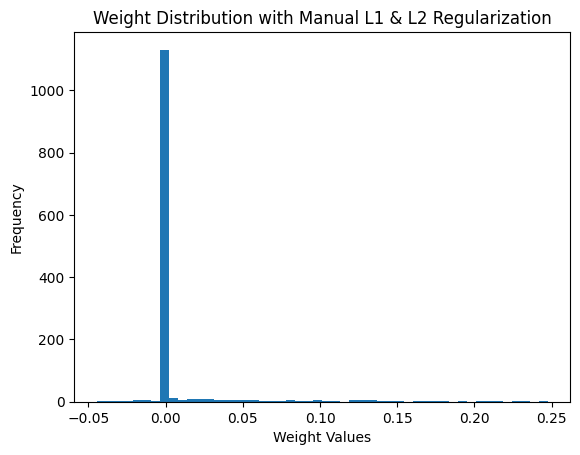

In [8]:
weights = model.layers[1].get_weights()[0].flatten()
plt.hist(weights, bins=50)
plt.title('Weight Distribution with Manual L1 & L2 Regularization')
plt.xlabel('Weight Values')
plt.ylabel('Frequency')
plt.show()

## **7. Key Takeaways and Best Practices**

#### **L1 Regularization**: Encourages sparsity, useful for feature selection.

#### **L2 Regularization**: Prevents large weights, leading to more stable models.

#### **Using Functional API**: Provides flexibility and modularity in model design.